In [1]:
import numpy as np
import pandas as pd
# Creamos las categorias
sexo=['M','F','Otro']
estatura= ['<150cm','150-170cm','170-190cm','>190cm']
cabello=['Corto','Mediano (hasta orejas)','Largo (supera hombros)']
color=['Rojo','Rubio','Castaño','Negro','Otro']
delineador=['Si','No']

In [3]:
# Creacion de datos artificiales
v_sexo=np.random.choice(sexo, 1000)
v_estatura=np.random.choice(estatura, 1000)
v_cabello=np.random.choice(cabello, 1000)
v_color=np.random.choice(color, 1000)
#v_delineador=np.random.choice(delineador, 100)

In [4]:
# Creacion del dataframe
df=pd.DataFrame()
df['Sexo']=v_sexo
df['Estatura']=v_estatura
df['Cabello']=v_cabello
df['Color']=v_color
df['Delineador'] = np.where(((df['Sexo']=='F') & ((df['Estatura'] == '<150cm')|(df['Estatura'] == '150-170cm'))) |
                            ((df['Sexo']=='M') & ((df['Estatura'] == '150-170cm')|(df['Estatura'] == '>190cm'))),
                            'Si', 'No')

df.head()

,Sexo,Estatura,Cabello,Color,Delineador
0,M,170-190cm,Mediano (hasta orejas),Rubio,No
1,F,<150cm,Largo (supera hombros),Rubio,Si
2,Otro,150-170cm,Mediano (hasta orejas),Negro,No
3,Otro,>190cm,Mediano (hasta orejas),Rubio,No
4,M,150-170cm,Mediano (hasta orejas),Otro,Si


In [5]:
df.Delineador.value_counts()

No    652
Si    348
Name: Delineador, dtype: int64

In [10]:
df.columns

Index(['Sexo', 'Estatura', 'Cabello', 'Color', 'Delineador'], dtype='object')

In [13]:
# Split en train y test
X=df[['Sexo', 'Estatura', 'Cabello', 'Color']]
#X= df.drop(columns='Delineador')
y= df['Delineador']
#from sklearn.preprocessing import OneHotEncoder
X_new=pd.get_dummies(X)


In [14]:
X

,Sexo,Estatura,Cabello,Color
0,M,170-190cm,Mediano (hasta orejas),Rubio
1,F,<150cm,Largo (supera hombros),Rubio
2,Otro,150-170cm,Mediano (hasta orejas),Negro
3,Otro,>190cm,Mediano (hasta orejas),Rubio
4,M,150-170cm,Mediano (hasta orejas),Otro
...,...,...,...,...
995,F,>190cm,Corto,Castaño
996,Otro,150-170cm,Largo (supera hombros),Negro
997,M,170-190cm,Mediano (hasta orejas),Rojo
998,M,170-190cm,Mediano (hasta orejas),Castaño


In [15]:
X_new

,Sexo_F,Sexo_M,Sexo_Otro,Estatura_150-170cm,Estatura_170-190cm,Estatura_<150cm,Estatura_>190cm,Cabello_Corto,Cabello_Largo (supera hombros),Cabello_Mediano (hasta orejas),Color_Castaño,Color_Negro,Color_Otro,Color_Rojo,Color_Rubio
0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
996,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0
997,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
998,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0


In [16]:
X_new.shape

(1000, 15)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)#cuanto mas grande 0.2

In [19]:
# Entrenar el arbol
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)#entrenar solo el train, el test no se toca

In [20]:
y_train.unique()

array(['Si', 'No'], dtype=object)

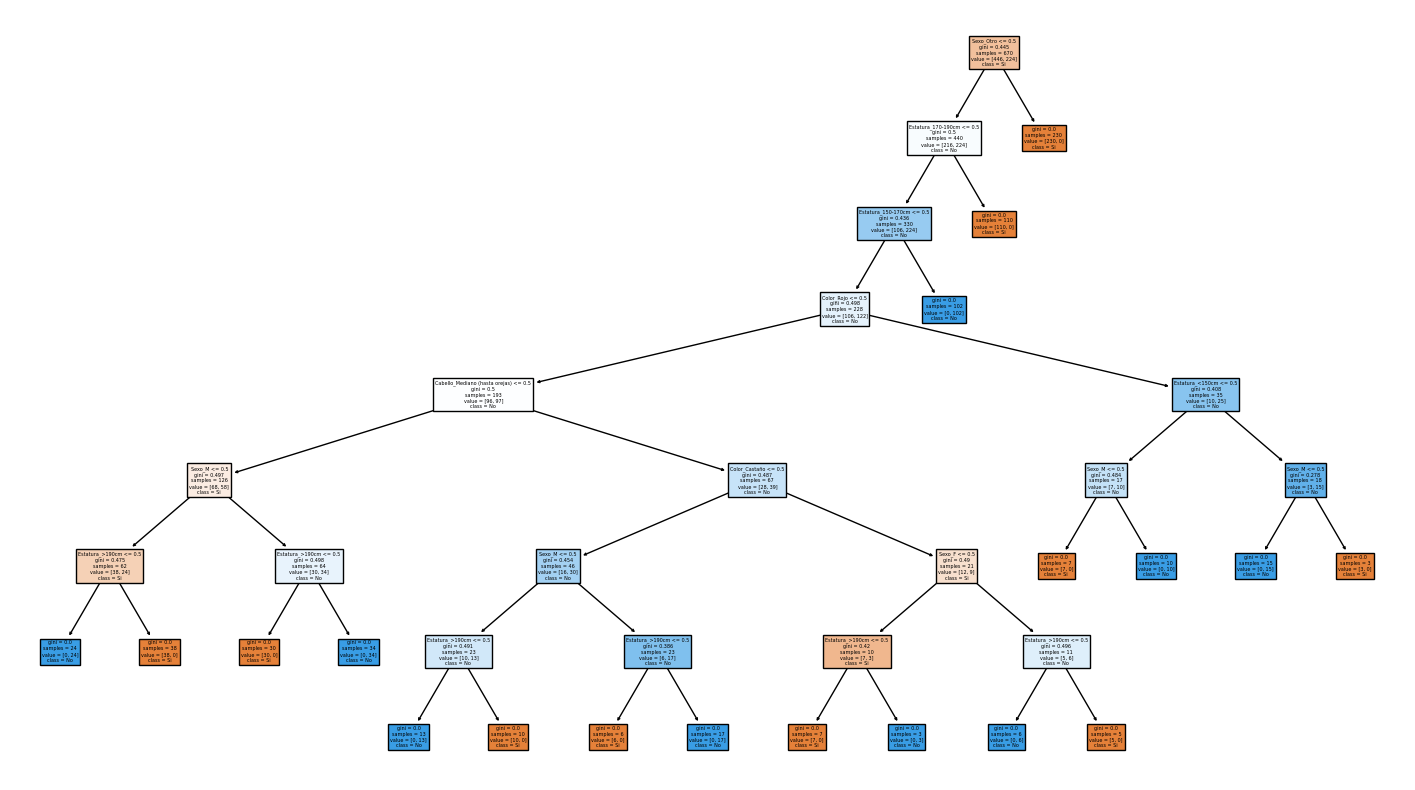

In [21]:
# Graficando
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,feature_names=X_train.columns,  #1°modelo, 2°nombre de las variables de X
                   class_names=y_train.unique(),#3°el nombre de las variables que contiene Y
                   filled=True)#para que escriba el criterio de division que uso

In [22]:
y_pred= clf.predict(X_test)#predecir ese entrenamiento sobre el train los datos del test

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       206
          Si       1.00      1.00      1.00       124

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



<Axes: >

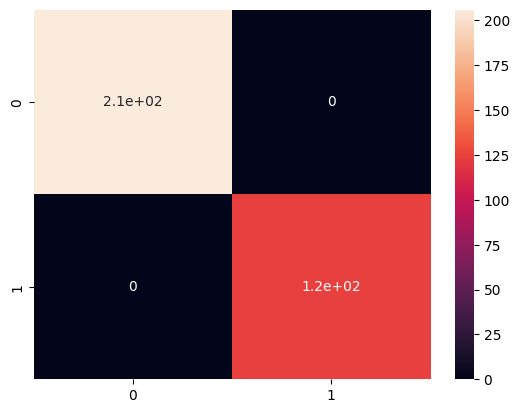

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
a = confusion_matrix(y_test, y_pred)
sns.heatmap(a, annot=True)